In [4]:
import pandas as pd
df = pd.read_csv('medicine.csv')
print("Shape:", df.shape)


Shape: (9720, 4)


In [7]:
display(df.head(8))

,index,Drug_Name,Reason,Description
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,Acne,Mild to moderate acne (spots)
1,2,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,Acne,A RET 0.025% is a prescription medicine that i...
2,3,ACGEL CL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...
3,4,ACGEL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...
4,5,Acleen 1% Lotion 25ml,Acne,treat the most severe form of acne (nodular ac...
5,6,Aclene 0.10% Gel 15gm,Acne,treat the most severe form of acne (nodular ac...
6,7,Acnay Gel 10gm,Acne,treat the most severe form of acne (nodular ac...
7,8,Acne Aid Bar 50gmAcne Aid Bar 100gm,Acne,Â treat acne vulgarisÂ


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9720 entries, 0 to 9719
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        9720 non-null   int64 
 1   Drug_Name    9720 non-null   object
 2   Reason       9720 non-null   object
 3   Description  9720 non-null   object
dtypes: int64(1), object(3)
memory usage: 303.9+ KB


In [8]:
# Distribution of target 'Reason'
reason_counts = df['Reason'].value_counts()
reason_pct = df['Reason'].value_counts(normalize=True).mul(100).round(2)
reason_df = pd.concat([reason_counts, reason_pct], axis=1).rename(columns={0:'count',1:'percent'})
display(reason_df.head(30))   # top 30 reasons


,count,proportion
Reason,,
Hypertension,2505,25.77
Infection,1109,11.41
Pain,1072,11.03
Fungal,509,5.24
Anaemia,252,2.59
General,243,2.50
Angina,219,2.25
Acne,204,2.10
Allergies,203,2.09


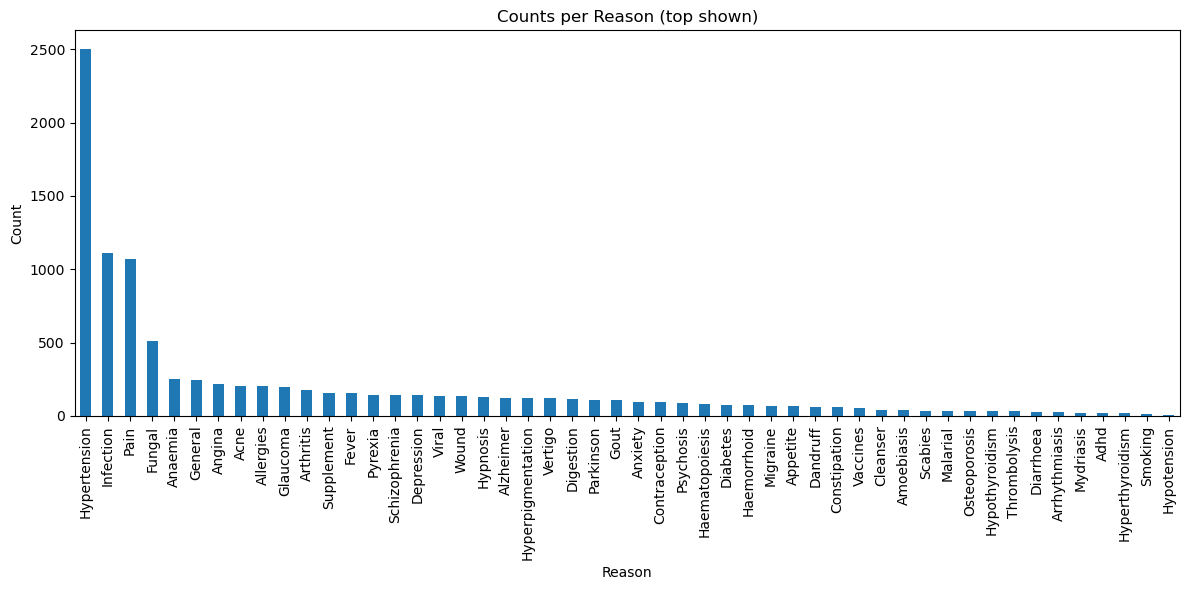

In [9]:
#plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
reason_counts.plot(kind='bar')
plt.title('Counts per Reason (top shown)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [11]:
# description lengths & drug name lengths
df['desc_len'] = df['Description'].str.len()
df['drug_len'] = df['Drug_Name'].str.len()
print(df[['desc_len','drug_len']].describe())



0        29
1        76
2       156
3       156
4        51
       ... 
9715     23
9716     29
9717     14
9718     15
9719    116
Name: desc_len, Length: 9720, dtype: int64
          desc_len     drug_len
count  9720.000000  9720.000000
mean     73.497016    41.933333
std      48.760169    33.445071
min       7.000000    10.000000
25%      34.000000    23.000000
50%      60.000000    28.000000
75%     109.000000    51.000000
max     260.000000   887.000000


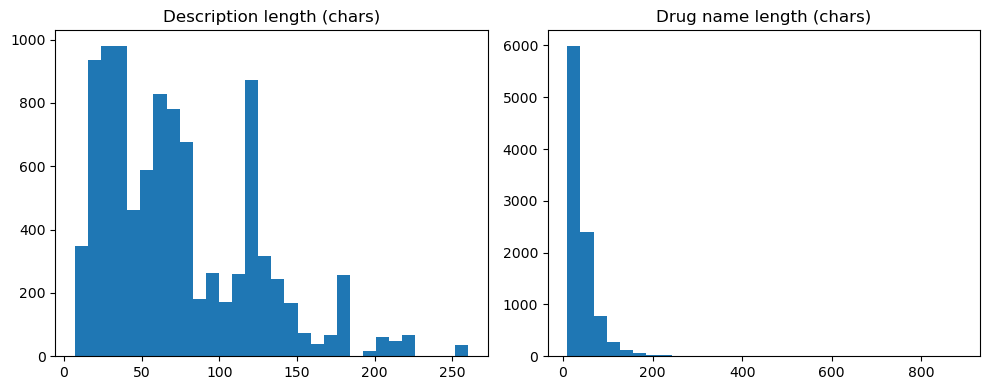

In [20]:
# Histograms
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(df['desc_len'], bins=30)
plt.title('Description length (chars)')

plt.subplot(1,2,2)
plt.hist(df['drug_len'], bins=30)
plt.title('Drug name length (chars)')
plt.tight_layout()
plt.show()

In [21]:
# Cell 4: Most common words
import re
from collections import Counter

texts = df['Description'].astype(str).str.lower().tolist()
# simple tokenization
tokens = []
for t in texts:
    # remove punctuation, keep words
    t = re.sub(r'[^a-z0-9\s]', ' ', t)
    tokens.extend(t.split())

# remove some stopwords (simple list)
stop = set(['and','the','for','in','of','to','a','used','is','with','patients','adults','child','children'])
cnt = Counter([w for w in tokens if w not in stop and len(w)>2])
print("Top 30 words in Description:")
print(cnt.most_common(30))


Top 30 words in Description:
[('blood', 2906), ('pressure', 2579), ('high', 2423), ('treat', 2087), ('pain', 1595), ('hypertension', 1591), ('lower', 1234), ('called', 1218), ('heart', 961), ('chest', 945), ('infection', 835), ('angina', 752), ('skin', 732), ('type', 726), ('stroke', 687), ('chance', 656), ('problem', 656), ('left', 656), ('ventricular', 656), ('hypertrophy', 656), ('treats', 634), ('treatment', 615), ('lvh', 578), ('infections', 553), ('disease', 543), ('fever', 529), ('which', 517), ('that', 514), ('treating', 473), ('acne', 463)]


Drug_Name
Zytrav 0.004% Eye Drops 3ml                                                                                                                                     1
1 AL M 10/5mg Tablet 10'S                                                                                                                                       1
1 AL Plus Capsule 10'S1 AL 10mg Tablet 15'S1 AL 5mg Tablet 10'S1 AL Max Tablet 10'S1 AL Syrup 30ml                                                              1
1000 Para 1000mg Tablet 12'S                                                                                                                                    1
2 B12 Capsule 15's                                                                                                                                              1
24 Karat Tablet 10'S                                                                                                                                            1
2BACONIL ICY MINT 

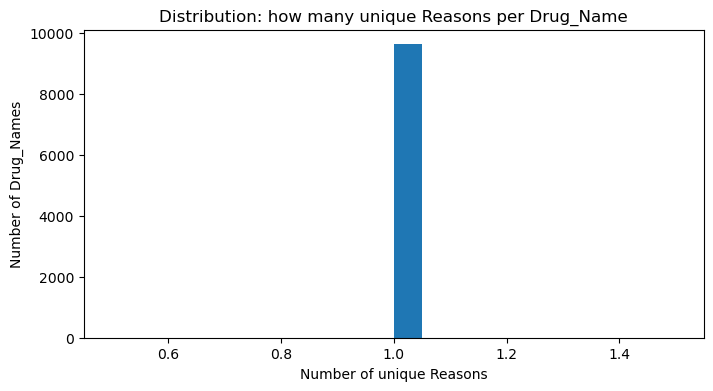

In [22]:
#  Are many drugs mapped to many reasons?
drug_reason = df.groupby('Drug_Name')['Reason'].nunique().sort_values(ascending=False)
display(drug_reason.head(20))
plt.figure(figsize=(8,4))
plt.hist(drug_reason, bins=20)
plt.title('Distribution: how many unique Reasons per Drug_Name')
plt.xlabel('Number of unique Reasons')
plt.ylabel('Number of Drug_Names')
plt.show()


In [23]:
import re
import string
# Copy dataset
df_clean = df.copy()

# 1. Lowercase
df_clean['clean_text'] = df_clean['Description'].str.lower()

# 2. Remove special characters, punctuation and numbers
df_clean['clean_text'] = df_clean['clean_text'].apply(lambda x: re.sub(r'[^a-z\s]', ' ', x))

# 3. Remove extra spaces
df_clean['clean_text'] = df_clean['clean_text'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

df_clean[['Description', 'clean_text']].head(10)


,Description,clean_text
0,Mild to moderate acne (spots),mild to moderate acne spots
1,A RET 0.025% is a prescription medicine that i...,a ret is a prescription medicine that is used ...
2,It is used to treat acne vulgaris in people 12...,it is used to treat acne vulgaris in people ye...
3,It is used to treat acne vulgaris in people 12...,it is used to treat acne vulgaris in people ye...
4,treat the most severe form of acne (nodular ac...,treat the most severe form of acne nodular acne
5,treat the most severe form of acne (nodular ac...,treat the most severe form of acne nodular acne
6,treat the most severe form of acne (nodular ac...,treat the most severe form of acne nodular acne
7,Â treat acne vulgarisÂ,treat acne vulgaris
8,Â treat acne vulgarisÂ,treat acne vulgaris
9,Â treat mild to moderate acne(spots),treat mild to moderate acne spots


In [25]:
import nltk
from nltk.corpus import stopwords

# Download stopwords first time (ignore warning next time)
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in stop_words])

df_clean['clean_text'] = df_clean['clean_text'].apply(remove_stopwords)

df_clean[['clean_text']].head(10)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tanukamboj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,clean_text
0,mild moderate acne spots
1,ret prescription medicine used reduce fine wri...
2,used treat acne vulgaris people years age olde...
3,used treat acne vulgaris people years age olde...
4,treat severe form acne nodular acne
5,treat severe form acne nodular acne
6,treat severe form acne nodular acne
7,treat acne vulgaris
8,treat acne vulgaris
9,treat mild moderate acne spots


In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_clean['label'] = le.fit_transform(df_clean['Reason'])

df_clean[['Reason', 'label']].head(3)


,Reason,label
0,Acne,0
1,Acne,0
2,Acne,0


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# features & target
X = df_clean['clean_text']
y = df_clean['label']

# split data (80 train / 20 test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

X_train_tfidf.shape, X_test_tfidf.shape


((7776, 2164), (1944, 2164))

In [32]:
#Model 1: Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Model
log_reg = LogisticRegression(max_iter=500, n_jobs=-1)

# Train
log_reg.fit(X_train_tfidf, y_train)

# Predict
y_pred = log_reg.predict(X_test_tfidf)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.98559670781893

Classification Report:

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        41
           1       0.00      0.00      0.00         3
           2       0.97      0.90      0.94        41
           3       1.00      1.00      1.00        25
           4       1.00      0.57      0.73         7
           5       0.96      1.00      0.98        50
           6       1.00      1.00      1.00        44
           7       1.00      1.00      1.00        19
           8       1.00      1.00      1.00        13
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00        36
          11       0.89      1.00      0.94         8
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        13
          15       1.00      1.00      1.00        28
          16       1.00      

/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


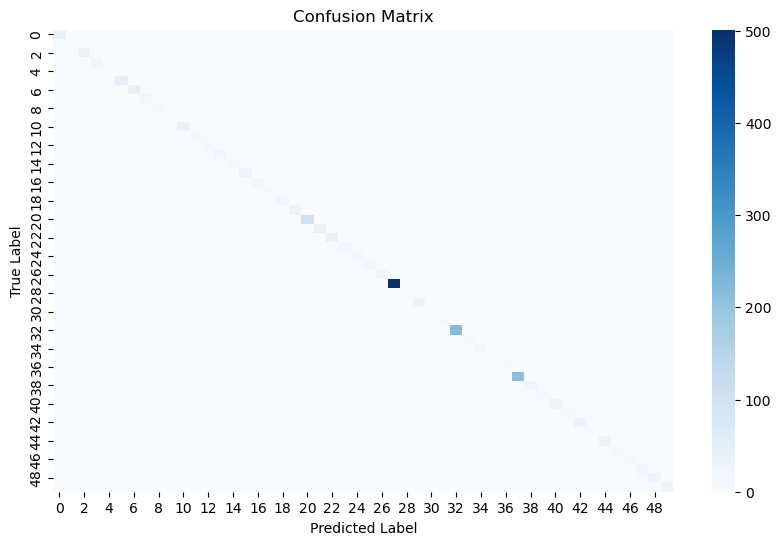

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [39]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_medicine(condition, top_n=5):
    condition = condition.lower().strip()
    
    # Filter dataset for the same condition
    subset = df_clean[df_clean['Reason'].str.lower() == condition]
    
    if subset.empty:
        return f"⚠ No medicines found for: {condition}"
    
    # Convert condition text into vector
    condition_vec = tfidf.transform([condition])
    
    # Convert medicine descriptions to vectors
    desc_vectors = tfidf.transform(subset['clean_text'])
    
    # Calculate similarity score
    similarity_scores = cosine_similarity(condition_vec, desc_vectors).flatten()
    
    # Pick top N medicines
    top_indices = similarity_scores.argsort()[::-1][:top_n]
    
    return subset.iloc[top_indices][['Drug_Name', 'Description', 'Reason']]


In [47]:
recommend_medicine("infection")


,Drug_Name,Description,Reason
7324,Itchnil Cream 20gm,infection during surgery,Infection
7320,Irivisc DS Eye Drops 10ml,infection during surgery,Infection
6942,Cebect TZ Forte Tablet 10'S,infection during surgery,Infection
6934,CCL Dry Syrup 30ml,infection during surgery,Infection
6930,Castor Eye Drops 10ml,infection during surgery,Infection
